In [1]:
from controller import *

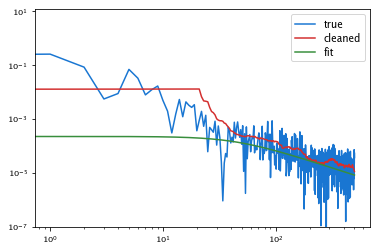

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


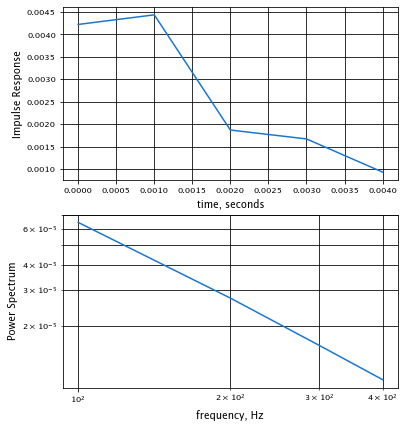

In [2]:
impulse = make_impulse(truth[:1000], N=10, plot=True)

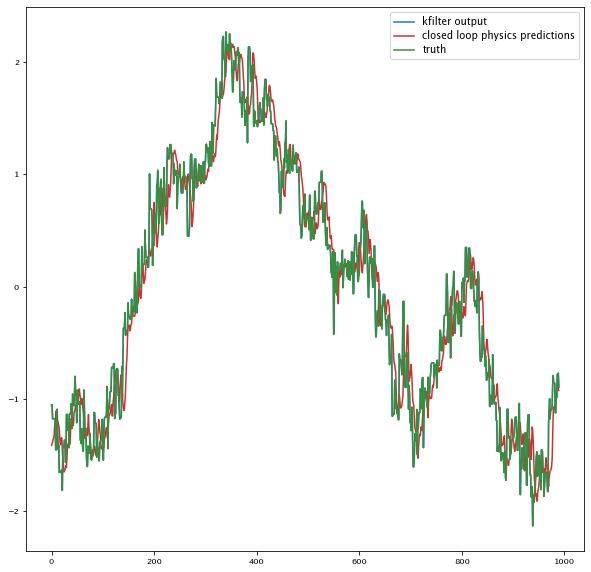

In [9]:
plt.figure(figsize=(10,10))
kalman.kfilter.state = np.flip(truth[1000:1010])
run, predict = kalman.kfilter.run(truth[1010:2000], save_physics=True)
plt.plot(run, label = 'kfilter output')
plt.plot(predict, label='closed loop physics predictions')
kalman.kfilter.state = np.flip(truth[:10])
plt.plot(truth[1010:2000], label='truth')
plt.legend()

In [10]:
show_control('kalman')

AttributeError: 'Controller' object has no attribute 'make_state'